# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

## 1. 분석의 목적과 변수 확인

## 2. 데이터 전체적으로 살펴보기

## 3. 데이터의 개별 속성 파악하기

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

## Mission 1
#### (Sibsp + Parch)  vs   Survived

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

titanic_df = pd.read_csv('./train.csv')

In [4]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
## Add column 'Fam' : the number of familly
titanic_df['Fam'] = titanic_df['SibSp']+titanic_df['Parch']

In [32]:
## Survival rate for each family nums
survival_rate = titanic_df[['Fam','Survived']].groupby(['Fam']).mean()

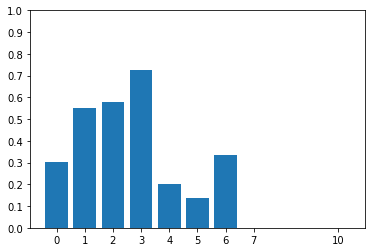

In [46]:
## Visualization
plt.bar(survival_rate.index,survival_rate['Survived'])
plt.xticks(survival_rate.index)
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

## Mission 2
#### Food Nutrition Data
source : https://www.kaggle.com/niharika41298/nutrition-details-for-most-common-foods

In [245]:
## data load
nutrition_df = pd.read_csv('nutrients_csvfile.csv')

In [246]:
nutrition_df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [247]:
nutrition_df.describe()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,335,335,335,334,335,335,333,335,335,335
unique,329,61,103,152,40,45,38,57,80,16
top,Butter,1 cup,100,100,1,t,0,0,0,"Breads, cereals, fastfood,grains"
freq,3,120,38,14,53,115,174,116,45,45


### Data Preproessing

In [248]:
## Since t represents a very small amount, it was changed to 0.
## and the broken data was removed.
nutrition_df.iloc[:,2:9] = nutrition_df.iloc[:,2:9].replace('t', '0')
nutrition_df.iloc[:,2:9] = nutrition_df.iloc[:,2:9].replace("t'", '0')
nutrition_df.iloc[:,2:9] = nutrition_df.iloc[:,2:9].replace('a', '0')
nutrition_df = nutrition_df.drop([91])
nutrition_df = nutrition_df.drop([100])

## string -> int
for i in range(2,9):
    nutrition_df.iloc[:,i] = nutrition_df.iloc[:,i].str.replace(',', '').astype(float)

In [249]:
## Unify all weights to 100 grams.
for i in range(3,9):
    nutrition_df.iloc[:,i] = nutrition_df.iloc[:,i]/nutrition_df['Grams']
    nutrition_df.iloc[:,i] = nutrition_df.iloc[:,i]*100
nutrition_df['Grams'] = 100
nutrition_df.drop(['Measure'], axis='columns')

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,100,67.622951,3.278689,4.098361,3.688525,0.000000,4.918033,Dairy products
1,Milk skim,100,36.585366,3.658537,0.000000,0.000000,0.000000,5.284553,Dairy products
2,Buttermilk,100,51.626016,3.658537,2.032520,1.626016,0.000000,5.284553,Dairy products
3,"Evaporated, undiluted",100,136.904762,6.349206,7.936508,7.142857,0.000000,9.523810,Dairy products
4,Fortified milk,100,96.758280,6.272023,2.959831,1.620860,0.098661,8.386187,Dairy products
...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,100,46.531792,0.000000,0.000000,0.000000,0.000000,12.138728,"Drinks,Alcohol, Beverages"
331,Ginger ale,100,30.346821,0.000000,0.000000,0.000000,0.000000,8.092486,"Drinks,Alcohol, Beverages"
332,Root beer,100,40.462428,0.000000,0.000000,0.000000,0.000000,10.115607,"Drinks,Alcohol, Beverages"
333,Coffee,100,1.304348,0.000000,0.000000,0.000000,0.000000,0.434783,"Drinks,Alcohol, Beverages"


In [250]:
## Unify sperated categories
nutrition_df['Category'] = nutrition_df['Category'].replace('Fruits A-F', 'Fruits')
nutrition_df['Category'] = nutrition_df['Category'].replace('Fruits G-P', 'Fruits')
nutrition_df['Category'] = nutrition_df['Category'].replace('Fruits R-Z', 'Fruits')

nutrition_df['Category'] = nutrition_df['Category'].replace('Vegetables A-E', 'Vegetables')
nutrition_df['Category'] = nutrition_df['Category'].replace('Vegetables F-P', 'Vegetables')
nutrition_df['Category'] = nutrition_df['Category'].replace('Vegetables R-Z', 'Vegetables')

## 1. Average calories by food type (per 100g)
#### Foods with high calories in order

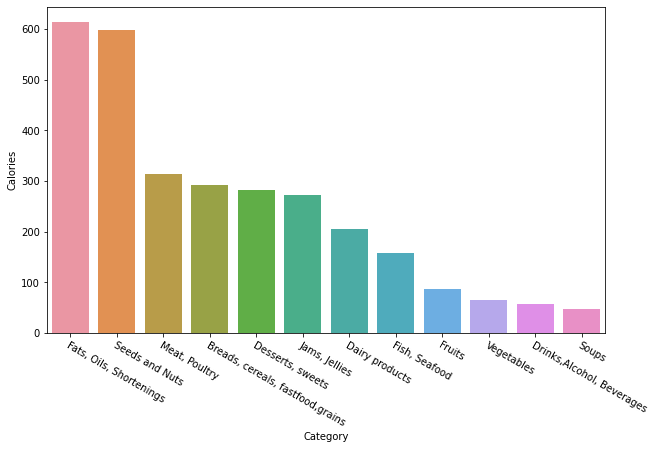

In [251]:
categ_cal = nutrition_df[['Category','Calories']].groupby(['Category']).mean()
categ_cal = categ_cal.sort_values(by=['Calories'], axis=0, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=categ_cal, x=categ_cal.index, y='Calories')
plt.xticks(rotation=-30, ha="left", rotation_mode='anchor')
plt.show()

## 2. Nutrition Composition by food type

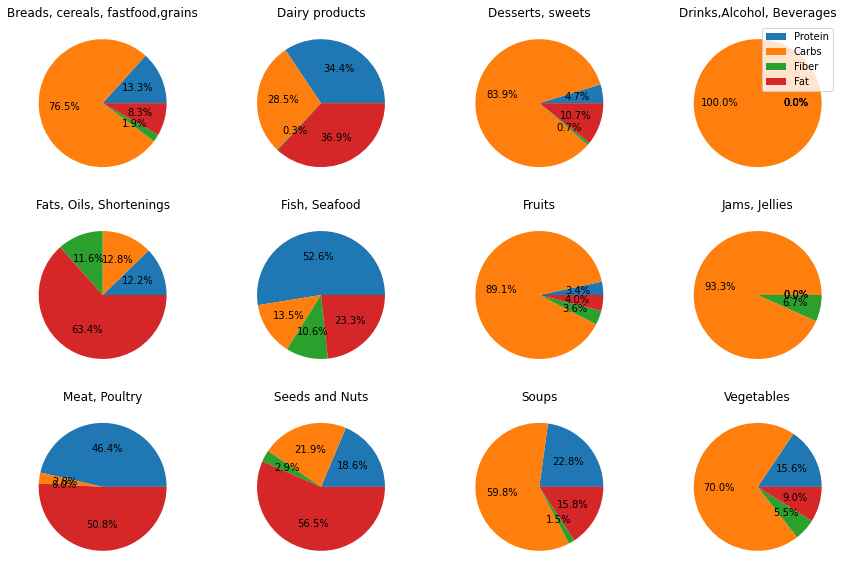

In [252]:
categ_nutri = nutrition_df[['Protein','Carbs','Fiber','Fat','Category']].groupby(['Category']).mean()
nutritions = ['Protein','Carbs','Fiber','Fat']

plt.figure(figsize=(15,10))
for i in range(len(categ_nutri)):    
    plt.subplot(3,4,i+1)
    plt.pie(categ_nutri.iloc[i], autopct='%1.1f%%')
    plt.title(categ_nutri.iloc[i].name)
    if i == 3:
        plt.legend(nutritions, loc='upper right',fontsize=10)
plt.show()

## 3. Which meat is the most protein-rich for the same calories?

In [255]:
nutri_cal = nutrition_df[['Food','Calories','Protein','Category']].copy()
nutri_cal = nutri_cal[nutri_cal['Category'] == 'Meat, Poultry']
nutri_cal['Protein'] = nutri_cal['Protein']/nutri_cal['Calories']*100
nutri_cal['Calories'] = 100
nutri_cal = nutri_cal.sort_values(by=['Protein'], axis=0, ascending=False)

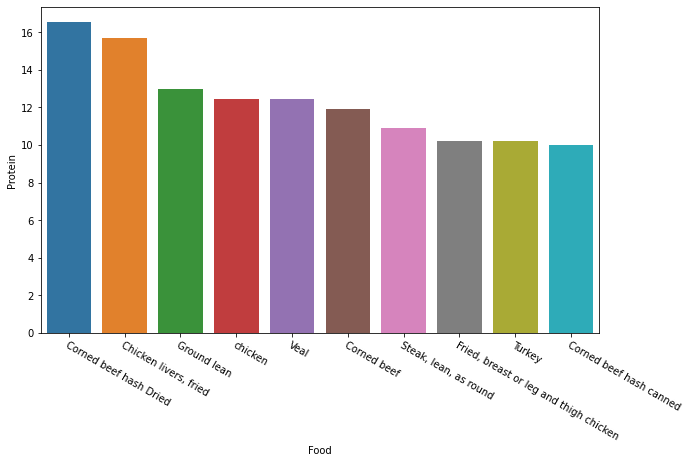

In [256]:
plt.figure(figsize=(10,6))
sns.barplot(data=nutri_cal.iloc[:10], x='Food', y='Protein')
plt.xticks(rotation=-30, ha="left", rotation_mode='anchor')
plt.show()